# Kmeans Clustering

We will discuss how to build a Kmeans clustering model from scratch.
# Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Load The Dataset

Data shape: (5000, 2)
Number of clusters: 3


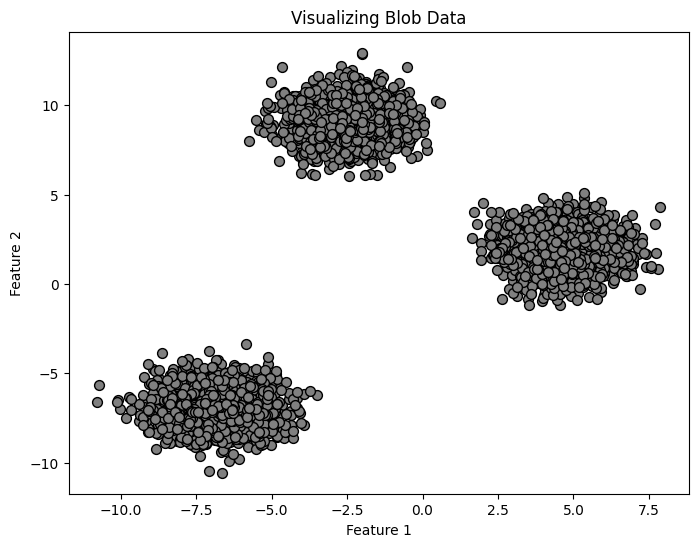

In [3]:
# Generate sample data
X, y = make_blobs(centers= 3 , n_samples= 5000 , n_features= 2, shuffle= True , random_state= 42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



print("Data shape:", X.shape)

print("Number of clusters:", len(np.unique(y)))


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='grey', marker='o', edgecolor='k', s=50)
plt.title('Visualizing Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## K-Means Clustering Algorithm (with Random Initialization and K-Means++ Initialization)

**Input:**

* Dataset $X$ with $n$ data points
* Number of clusters $K$

**Output:**

* Final centroids
* Cluster assignments for each data point

### **Algorithm**
For Initialize Centroids we have two options:

**Option 1:**
1. **Random Initialization**

   1.1. Choose $K$ data point (centroids) at random from $X$

**Option 2:**
1. **Initialize Centroids using K-Means++:**

   1.1. Choose one data point at random from $X$ as the first centroid.

   1.2. For each data point $x$ in $X$, compute the distance to the nearest existing centroid.

   1.3. Convert these distances into probabilities using the softmax function:

   $$
   p(x_i) = \frac{e^{d(x_i)}}{\sum_j e^{d(x_j)}}
   $$

   1.4. Select the next centroid randomly, using the computed probabilities.

   1.5. Repeat steps 1.2–1.4 until $K$ centroids are selected.

2. **Repeat until convergence (or max iterations):**

   2.1. **Assign each point to the nearest centroid:**
   For each data point $x$, assign it to the cluster with the nearest centroid (using Euclidean distance).

   2.2. **Update centroids:**
   For each cluster, compute the new centroid as the mean of all points assigned to that cluster.

   2.3. **Check for convergence:**
   If the centroids do not change (or change very little), stop. Otherwise, repeat from step 2.1.

3. **Return the final centroids and clusters.**

## Compute Euclidean distance

computes the Euclidean distance between two points (vectors) $c$ and $x$ in $\mathbb{R}^n$.

Given two vectors:

* $\mathbf{c} = [c_1, c_2, \dots, c_n]$
* $\mathbf{x} = [x_1, x_2, \dots, x_n]$

The Euclidean distance between $\mathbf{c}$ and $\mathbf{x}$ is:

$$
d(\mathbf{c}, \mathbf{x}) = \sqrt{\sum_{i=1}^{n} (c_i - x_i)^2}
$$

Alternatively, using vector notation:

$$
d(\mathbf{c}, \mathbf{x}) = \|\mathbf{c} - \mathbf{x}\|_2
$$

Where:

* $\| \cdot \|_2$ is the **L2 norm** (Euclidean norm).

In [4]:
# Compute Euclidean distance
def distance(c, x):
    return np.sqrt(np.sum((c - x) ** 2))

## Step 1: Initialization
Here we implement the two initilization method:
1. Random initialization
2. Kmean++ initializatio

In [5]:
# Random Initialzation Of Centroids
def random_centroids_initialzation(X, K):
  idx = np.random.choice(len(X),K,replace=False)
  return X[idx]

# Softmax To calaculate Probabilies
def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

# Kmeans++ Initialzation Of Centroids
def kmeans_plusplus_centroids_initialzation(X, K):
  n_samples = X.shape[0]

  centroids = []
  first_centroids = X[np.random.choice(n_samples)]
  centroids.append(first_centroids)

  for i in range(K - 1):
      d = np.array([
          min(distance(c,x) for c in centroids)
          for x in X
      ])
      probabilities = softmax(d)
      new_centroids_index = np.random.choice(n_samples, p=probabilities)
      centroids.append(X[new_centroids_index])

  return np.array(centroids)


## Step 2: Assign Clusters Assignment

In [6]:
# Assign Clusters
def assign_clusters(X, centroids):
  labels = np.array([
      np.argmin([distance(c, x) for c in centroids])
      for x in X
  ])
  return labels

## Step 3: Compute Centroids

In [7]:
# Compute Centroids
def compute_centroids(X, labels, k):
    centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
        else:
            centroid = X[np.random.randint(0, len(X))]
        centroids.append(centroid)
    return np.array(centroids)

## Step 4: Check For Convergence
The algorithm is said to have converged when the centroids no longer change significantly.


$$
\|c_i - c_i'\| < \epsilon \quad \text{for all elements}
$$

Where,

* $c_i$: value of the $i$-th coordinate in the current centroid
* $c_i'$: value of the $i$-th coordinate in the new centroid
* $\epsilon$: a small positive number (tolerance, like 1e-4)

This condition checks if  every coordinate of each centroid changed by less than a very small amount.If all** changes are smaller than $\epsilon$, we say the centroids have converged.


In [8]:
# Check For Convergence
#def is_converged(centroids,new_centroids):
 # return np.allclose(centroids, new_centroids)

def is_converged(centroids, new_centroids, tol=1e-4):
  shift = np.linalg.norm(centroids - new_centroids)
  return shift < tol

## Inertia
Inertia is the sum of squared distances from each point to its assigned cluster centroid. Lower inertia indicates more compact clusters.

Mathematically:

$$
\text{Inertia} = \sum_{i=1}^{n} \|x_i - \mu_{c_i}\|^2
$$

Where:

* $x_i$: data point
* $\mu_{c_i}$: centroid of the cluster assigned to $x_i$

In [9]:
def compute_inertia(X, labels, centroids):
    inertia = 0.0
    for x, label in zip(X, labels):
        inertia += np.sum((x - centroids[label]) ** 2)
    return inertia

## Make Prediction
We impliment a function the classify new datapoints to the found classes

In [10]:
def predict(X_new, centroids):
    labels = []
    for x in X_new:
        # Find the closest centroid
        distances = [distance(c, x) for c in centroids]
        label = np.argmin(distances)
        labels.append(label)
    return np.array(labels)


## Plottig Clusters and Centroids

In [11]:
def plot_clusters(X, clusters, centroids, new_points=None):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot clusters
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            ax.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')

    # Plot centroids
    for point in centroids:
        ax.scatter(*point, marker="x", color="black", linewidth=2, s=100, label="Centroid")

    # Plot new points if provided
    txt = ""
    if new_points is not None:
        txt = "with New Points"
        new_points = np.array(new_points)
        ax.scatter(new_points[:, 0], new_points[:, 1], color='red', marker='o', edgecolor='black',
                   s=50, label='New Points')

    ax.set_title(f"K-Means Clustering {txt}")
    ax.legend()
    plt.grid(True)
    plt.show()


## Step 5: Kmeans Function

In [12]:
# Kmeans Function
def Kmeans(X,K,max_iters=100, initialize_centroids_func=None, random_state=None):

    # Seed
    np.random.seed(random_state)

    # Initialize Centroids
    centroids = initialize_centroids_func(X, K)
    converged = False
    n_iter = 0
    for i in range(max_iters):

        # Assign each point to the nearest centroid
        labels = assign_clusters(X, centroids)

        # Group points by cluster
        clusters = [[] for _ in range(K)]
        for point, label in zip(X, labels):
            clusters[label].append(point)

        # Compute new centroids
        new_centroids = compute_centroids(X, labels, K)

        # Convergence check
        if is_converged(centroids,new_centroids):
            converged = True
            break

        centroids = new_centroids
        n_iter+=1
    inertia = compute_inertia(X, labels, centroids)

    return centroids, clusters,labels,inertia,n_iter+1

## Testing: Random Initialization

Number of iterations (Random): 3
Inatia: 10059.170819374773


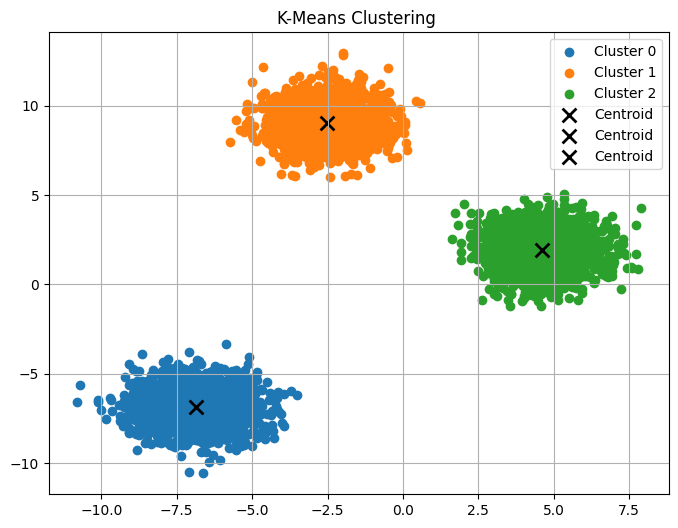

In [13]:
# Kmeans With Random Initialization
centroids,clusters,labels,inertia,kmeans_basic_iter = Kmeans(X,K=3,
                                              max_iters=100,
                                              initialize_centroids_func=random_centroids_initialzation,
                                              random_state = 42)

print(f"Number of iterations (Random): {kmeans_basic_iter}")
print(f"Inatia: {inertia}")
plot_clusters(X_train, clusters, centroids)

## Testing: Kmean++ Initialization

Number of iterations (Kmean++): 2
Inatia: 10059.170819374773


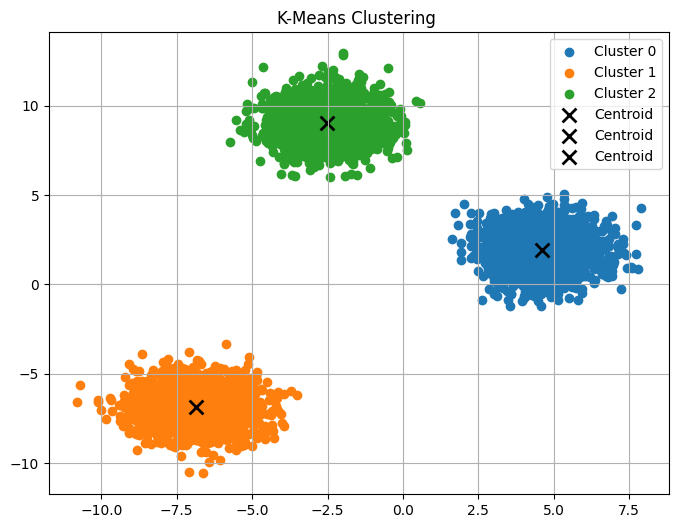

In [14]:
# Kmeans With Kmean++ Random Initialization
centroids,clusters,labels,inertia,kmeans_basic_iter = Kmeans(X,K=3,
                                              max_iters=100,
                                              initialize_centroids_func=kmeans_plusplus_centroids_initialzation,
                                              random_state = 42)

print(f"Number of iterations (Kmean++): {kmeans_basic_iter}")
print(f"Inatia: {inertia}")
plot_clusters(X_train, clusters, centroids)

### Make Prediction

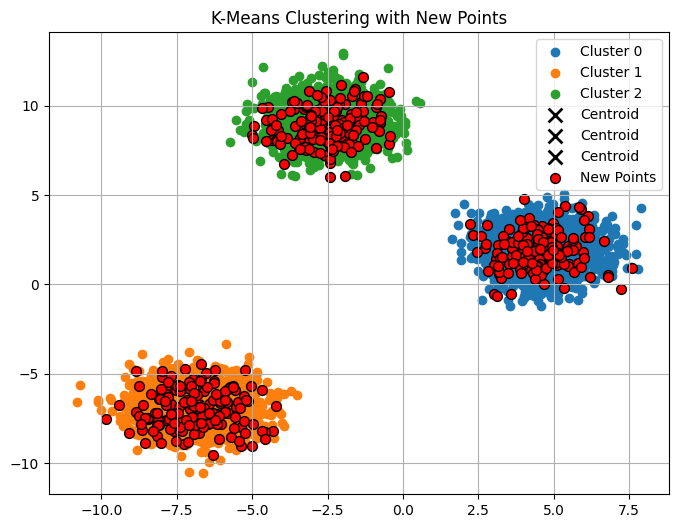

In [15]:
# Predict for new points
predicted_labels = predict(X_test, centroids)

# Plot 
plot_clusters(X_train, clusters, centroids, new_points=X_test)

## Kmeans Clustering Class
Here we have combined all that we have discussed above in to a class. You can see the usage below

Number of iterations (KMeans++): 2
Inertia: 8992.47


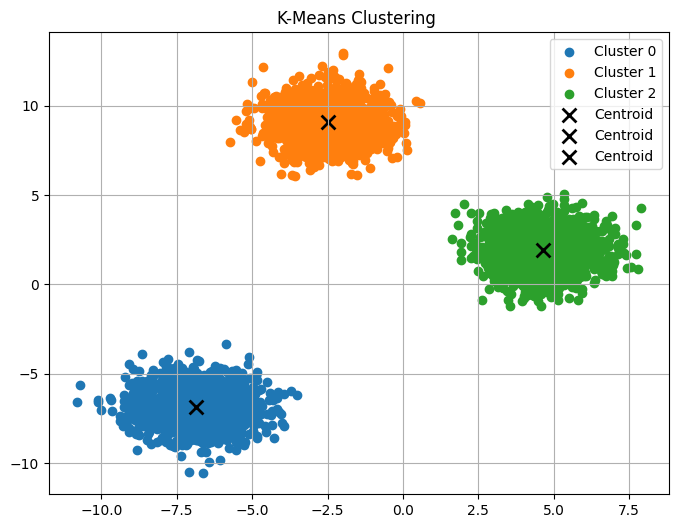

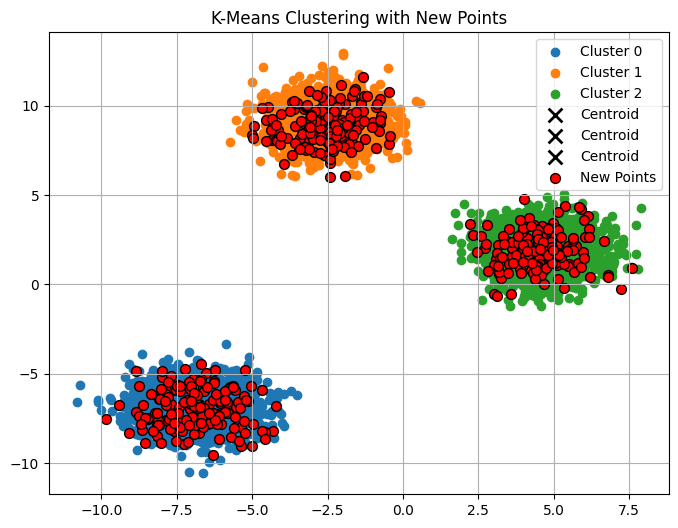

In [16]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from ek_ml_package.kmeans import Kmeans

# Initialize model
model = Kmeans(k=3, initialization="kmean++", random_state=42)

#Fit the model
model.fit(X_train)

print(f"Number of iterations (KMeans++): {model.n_iter}")
print(f"Inertia: {model.inertia:.2f}")

plot_clusters(X_train,model.clusters,model.centroids)

# Predict for new points
predicted_labels = model.predict(X_test)

# Plot 
plot_clusters(X_train,model.clusters,model.centroids, new_points=X_test)